# Modelo de Segregación de Schelling (Discreto)

### Reglas


- Dos diferentes tipos de agentes distribuidos en un espacio finito de dimensión 2.
- En cada iteración se elige un agente al azar se ve a sus vecinos y si cierta fracción de ellos son del otro tipo, salta a otro lugar aleatoriamente escogido en el espacio.


## Agente del modelo de Schelling

Creamos una clase para el agente. En el `__init__` definimos las propiedades internas de cada agente 

In [1]:
class AgenteSchelling:
    """
    Agente del modelo de Schelling Discreto
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al agente. Float.        
    """
    def __init__(self,color,pos, tolerancia):
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia

#### Creamos un agente a partir de nuestra clase definida arriba

In [2]:
agente1 = AgenteSchelling('red',(0,1),0.6)

#### A través del punto (.) podemos acceder a los atributos de nuestra clase agente

In [109]:
print(agente1.color)
print(agente1.pos)
print(agente1.tolerancia)

rojo
(0, 0)
0.4


## Importamos la clase Agent y Model del modulo `mesa`

Utilizaremos la ventajas de la OOP (programación orientada a objetos) y creamos una clase secundaria a partir de la clase `Agent`  de `mesa`.

In [110]:
from mesa import Agent, Model

In [14]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, tolerancia, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        

También creamos una clase secundaria para nuestro modelo a partir de la clase `Model`  de `mesa`.

In [14]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    """
    def __init__(self,ancho,largo):
        self.ancho = ancho
        self.largo = largo

## Definimos el espacio donde se van a mover los agentes

`mesa.space` contiene diferentes tipos de mallas donde se moverán los agentes:  `Single, MultiGrid, ContinouosSpace, HexGrid, NetworkGrid.`
`SingleGrid` permite colocar solo un agente en cada posición de la malla

In [6]:
from mesa.space import SingleGrid 

In [14]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, tolerancia, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    """
    def __init__(self,ancho,largo):
        self.ancho = ancho
        self.largo = largo
        # Con torus=True le decimos que active la topología en forma de toroide
        self.grid = SingleGrid(ancho, largo, torus= True)

#### Inicializamos el modelo

In [17]:
modelo_prueba = ModeloSchelling(10,10)

# Atributos del modelo
print(modelo_prueba.ancho)
print(modelo_prueba.largo)

10
10


#### Inicializamos un agente

In [11]:
agente1 = AgenteSchelling('rojo',(0,0), 0.4,modelo_prueba)

# Atributos del agente
print(agente1.color)
print(agente1.pos)
print(agente1.tolerancia)

rojo
(0, 0)
0.4


#### Podemos acceder a la malla

In [18]:
modelo_prueba.grid.grid

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

#### Con `.find_empty` podemos encontrar posciones en la malla que estén vacías

In [21]:
modelo_prueba.grid.find_empty()

(2, 9)

## Definimos la regla que obecede cada agente

Dentro de nuestra clase `AgenteSchelling` se define un método que llamado `step()` en el cual se programará las regla que siguen los agentes.

In [35]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
        
    """
    def __init__(self,color,pos, tolerancia, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.tolerancia:
            self.model.grid.move_to_empty(self)
        

## Definimos la configuración inicial del modelo

In [25]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad):
        self.ancho = ancho
        self.largo = largo
        # Con torus=True le decimos que active la topología en forma de toroide
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(color,pos,tolerancia, self )
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)

#### Inicializamos el modelo

In [26]:
modelo_prueba = ModeloSchelling(10,10,2)

#### Podemos acceder a la malla y saber que posciones ocupan los agentes en el espacio

In [27]:
modelo_prueba.grid.grid

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,

#### Colocándonos en la posición del agente dentro de la malla podemos acceder a los atributos del agente

In [31]:
modelo_prueba.grid.grid[9][9].color

'blue'

### ¿En qué orden vamos a activar los agentes en cada iteración?

`mesa.time` contiene tres diferentes activación:  `BasedScheduler, RandomActivation, SimultaneousActivation, StagedActivation`
Con`RandomActivation` el orden de los agentes es aleatorio en cada iteracción o paso.

In [33]:
from mesa.time import RandomActivation 

In [93]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(color,pos,tolerancia,self)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

#### Inicializamos el modelo

In [95]:
modelo_p1 = ModeloSchelling(10,10,70)

AttributeError: 'AgenteSchelling' object has no attribute 'unique_id'

Nos marca un error. Esto se debe a que la clase raíz `Agent`, en la que basaremos nuestros agentes, necesita como argumentos un _identificador único_ y el _modelo_ como argumentos para inicializar un agente. Además queremos inicializar los valores en la clase raíz, por lo que utilizamos `super().__init__(unique_id,model)` así que modificamos los argumentos del constructor de la clase `AgenteSchelling` además donde creamos los agentes dentro del modelo `ModeloSchelling`


In [35]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
        
    """
    def __init__(self,unique_id, model,color,pos, tolerancia):
        # Aqui van los atributos del agente
        super().__init__(unique_id,model)
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.tolerancia:
            self.model.grid.move_to_empty(self)
        

In [93]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(i,self, color,pos,tolerancia)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

### Inicializamos el modelo

In [104]:
modelo_p1 = ModeloSchelling(10,10,60)

### Dibujamos los agentes en su posición inicial

In [103]:
import matplotlib.pyplot as plt
import numpy as np

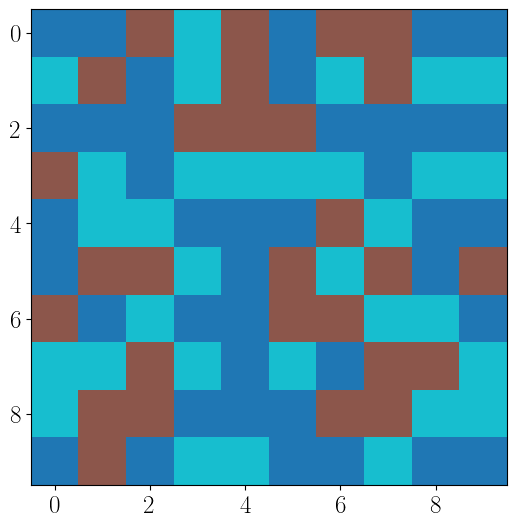

In [105]:
matrix_grid = np.zeros((modelo_p1.grid.width, modelo_p1.grid.height))

for vecino in modelo_p1.grid.coord_iter():
    cell_content, x, y = vecino
    # Como usaremos un mapa de color (cmap) asignaremos un color con el valor 0 y otros dos 
    # colores diferentes con los valores  0.5 y 1
    if cell_content == None:
        matrix_grid[x][y] = 0 
    else:
        if cell_content.color == "blue":
            matrix_grid[x][y] = 0.5
        if cell_content.color == "red":
            matrix_grid[x][y] = 1

plt.imshow(matrix_grid, cmap='tab10',interpolation='nearest')

### Iteramos el modelo unas 1000 veces

In [106]:
for i in range(1000):
    modelo_p1.step()

### Dibujamos los agentes 1000 iteraciones después

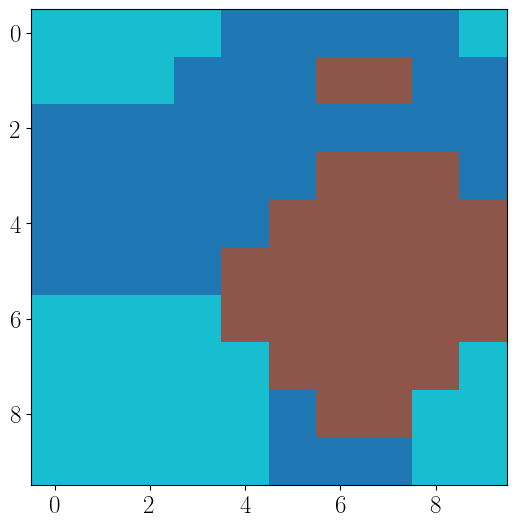

In [107]:
matrix_grid = np.zeros((modelo_p1.grid.width, modelo_p1.grid.height))

for vecino in modelo_p1.grid.coord_iter():
    cell_content, x, y = vecino
    # Como usaremos un mapa de color (cmap) asignaremos un color con el valor 0 y otros dos 
    # colores diferentes con los valores  0.5 y 1
    if cell_content == None:
        matrix_grid[x][y] = 0
    else:
        if cell_content.color == "blue":
            matrix_grid[x][y] = 0.5
        if cell_content.color == "red":
            matrix_grid[x][y] = 1

plt.imshow(matrix_grid, cmap='tab10', interpolation='nearest')

# Voìla!